# Απάντηση Ε1-assignment3

### Ε1: Πρόβλεψη Σθένους άνευ Νευρωνικών Δικτύων

In [2]:
# φόρτωση βιβλιοθηκών
import glob
import re
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime

In [3]:
# φόρτωση αρχείων
header = 0
dfs = []
for file in glob.glob('Charts/*/201?/*.csv'):
    dates = re.findall('\d{4}-\d{2}-\d{2}', file.split('/')[-1])
    weekly_chart = pd.read_csv(file, header=header, sep='\t')
    weekly_chart['week_start'] = datetime.strptime(dates[0], '%Y-%m-%d')
    weekly_chart['week_end'] = datetime.strptime(dates[1], '%Y-%m-%d')
    dfs.append(weekly_chart)

all_charts = pd.concat(dfs)

In [4]:
all_charts.head()

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06


In [5]:
all_charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273600 entries, 0 to 199
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   position            273600 non-null  int64         
 1   song_id             273600 non-null  object        
 2   song_name           273457 non-null  object        
 3   artist              273459 non-null  object        
 4   streams             273600 non-null  int64         
 5   last_week_position  238803 non-null  float64       
 6   weeks_on_chart      273600 non-null  int64         
 7   peak_position       273600 non-null  int64         
 8   position_status     273600 non-null  object        
 9   week_start          273600 non-null  datetime64[ns]
 10  week_end            273600 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 25.0+ MB


In [6]:
charts=all_charts.iloc[:,0:4]
charts.info()  # για αυτα τα τραγούδια θα πάρουμε τα χαρακτηρηστικά που χρειαζόμαστε

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273600 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   position   273600 non-null  int64 
 1   song_id    273600 non-null  object
 2   song_name  273457 non-null  object
 3   artist     273459 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.4+ MB


In [7]:
# χρσησιμοποιούμε το api του spotify
from spotify_config import config
client_credentials_manager = SpotifyClientCredentials(config['client_id'],config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)  

In [8]:
# παίρνουμε ολα τα χαρακτηριστικά ενός κομματιού για τα μοναδικά τραγούδια
features = {}
all_track_ids = list(charts['song_id'].unique())
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

In [9]:
features_df= pd.DataFrame.from_dict(features, orient='index')
features_df.reset_index(drop=True, inplace=True)

In [10]:
features_df.rename(columns={'id':'song_id'}, inplace=True)

In [11]:
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,song_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.681,0.594,7,-7.028,1,0.2820,0.1650,0.000003,0.134,0.5350,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.180,0.7420,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
2,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.6610,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
3,0.735,0.451,0,-8.374,1,0.0585,0.0631,0.000013,0.325,0.0862,117.973,audio_features,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,https://api.spotify.com/v1/audio-analysis/3NdD...,245200,4
4,0.670,0.838,0,-4.031,1,0.0362,0.0604,0.000611,0.159,0.7170,104.998,audio_features,78rIJddV4X0HkNAInEcYde,spotify:track:78rIJddV4X0HkNAInEcYde,https://api.spotify.com/v1/tracks/78rIJddV4X0H...,https://api.spotify.com/v1/audio-analysis/78rI...,222041,4


In [12]:
features_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      13880 non-null  float64
 1   energy            13880 non-null  float64
 2   key               13880 non-null  int64  
 3   loudness          13880 non-null  float64
 4   mode              13880 non-null  int64  
 5   speechiness       13880 non-null  float64
 6   acousticness      13880 non-null  float64
 7   instrumentalness  13880 non-null  float64
 8   liveness          13880 non-null  float64
 9   valence           13880 non-null  float64
 10  tempo             13880 non-null  float64
 11  type              13880 non-null  object 
 12  song_id           13880 non-null  object 
 13  uri               13880 non-null  object 
 14  track_href        13880 non-null  object 
 15  analysis_url      13880 non-null  object 
 16  duration_ms       13880 non-null  int64 

In [13]:
charts_for_train=pd.merge(features_df,charts,on='song_id').drop_duplicates(subset=['song_id'], keep='first',ignore_index=True)

In [14]:
charts_for_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'song_id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'position', 'song_name', 'artist'],
      dtype='object')

In [15]:
charts_for_train.drop(columns=( ['uri', 'track_href', 'analysis_url', 'time_signature','position','type']), inplace=True)

In [16]:
charts_for_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_id,duration_ms,song_name,artist
0,0.681,0.594,7,-7.028,1,0.2820,0.1650,0.000003,0.134,0.5350,186.054,5aAx2yezTd8zXrkmtKl66Z,230453,Starboy,The Weeknd
1,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.180,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW,251088,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit
2,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.6610,95.010,7BKLCZ1jbUBVqRi2FVlTVw,244960,Closer,The Chainsmokers
3,0.735,0.451,0,-8.374,1,0.0585,0.0631,0.000013,0.325,0.0862,117.973,3NdDpSvN911VPGivFlV5d0,245200,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN
4,0.670,0.838,0,-4.031,1,0.0362,0.0604,0.000611,0.159,0.7170,104.998,78rIJddV4X0HkNAInEcYde,222041,Call On Me - Ryan Riback Extended Remix,Starley


In [17]:
# τώρα θα βρούμε ολα τα χαρακτηριστικά για τα κομματιά που θέλουμε να προβλέψουμε το 'valence'
charts_for_predict=pd.read_csv('spotify_ids.txt', header=None,names=['song_id'])
charts_for_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  1162 non-null   object
dtypes: object(1)
memory usage: 9.2+ KB


In [18]:
features_1={}
all_track_ids = list(charts_for_predict['song_id'].unique())
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features_1.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [19]:
features_df_1= pd.DataFrame.from_dict(features_1, orient='index')
features_df_1.reset_index(drop=True, inplace=True)

In [20]:
features_df.rename(columns={'id':'song_id'}, inplace=True)

In [21]:
charts_for_predict=features_df_1.drop(columns=( ['uri', 'track_href', 'analysis_url', 'time_signature','type']))

In [22]:
charts_for_predict.rename(columns={'id':'song_id'}, inplace=True)

In [23]:
charts_for_train.drop(columns=['artist', 'song_name'], inplace=True)

In [24]:
# παρακάτω έχουμε τα 2 dataframes πάνω στα οποία θα πειραματιστούμε

In [25]:
charts_for_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1162 non-null   float64
 1   energy            1162 non-null   float64
 2   key               1162 non-null   int64  
 3   loudness          1162 non-null   float64
 4   mode              1162 non-null   int64  
 5   speechiness       1162 non-null   float64
 6   acousticness      1162 non-null   float64
 7   instrumentalness  1162 non-null   float64
 8   liveness          1162 non-null   float64
 9   valence           1162 non-null   float64
 10  tempo             1162 non-null   float64
 11  song_id           1162 non-null   object 
 12  duration_ms       1162 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 118.1+ KB


In [26]:
charts_for_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      13880 non-null  float64
 1   energy            13880 non-null  float64
 2   key               13880 non-null  int64  
 3   loudness          13880 non-null  float64
 4   mode              13880 non-null  int64  
 5   speechiness       13880 non-null  float64
 6   acousticness      13880 non-null  float64
 7   instrumentalness  13880 non-null  float64
 8   liveness          13880 non-null  float64
 9   valence           13880 non-null  float64
 10  tempo             13880 non-null  float64
 11  song_id           13880 non-null  object 
 12  duration_ms       13880 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.4+ MB


In [27]:
# εφαρμογή μηχανικής μάθησης

---
#### 1η μέθοδος Regression
---

In [28]:
# φόρτωση βιβλιοθηκών
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [29]:
# δεδομένα εκπαίδευσης και ελέγχου
X=charts_for_train.drop(['song_id','duration_ms','valence'], axis=1)
y=charts_for_train.valence

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # κάνω διαχωρισμό δεδομένων

In [31]:
# στην συνέχεια θα κανονικοποιήσω τα δεδομένα μας , θαν π΄άρουμε  το z-score

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# εκτίμηση για τα δεδομένα εκπαίδευσης

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
print('The mean average error: ',mean_absolute_error(y_train, model.predict(X_train_scaled))) # mae στα δεδομένα εκπαίδευσης

The mean average error:  0.15386423354282666


In [37]:
# εκτίμηση για τα δεδομένα ελέγχου

In [38]:
print('The mean average error: ',mean_absolute_error(y_test, model.predict(X_test_scaled))) # mae στα δεδομένα ελέγχου

The mean average error:  0.15130007460469103


In [39]:
# παρατηρούμε ότι το μοντέλο μας δουλέυει καλά τόσο στα δεδομένα εκαπίδευσης , όσο και στα δεδομένα ελέγχου, διότι βλέπουμε οτι το mean_absolute_error 
# είναι σχετικά μικρό και η προβλεψή μας απέχει σχετικά λίγο απο τον στόχο. 
# μια σημαντική διαφορά ανάμεσα στα 2 'mean_absolute_error' θα ήταν υποψία υπερπροσαρμογής

In [40]:
print(model.predict(X_test_scaled)) # προβλέψεις

[0.43493031 0.61220795 0.56573444 ... 0.34395001 0.37893033 0.67208365]


In [41]:
print(y_test.values) # στόχοι

[0.515 0.727 0.612 ... 0.465 0.275 0.549]


In [42]:
# τώρα θα πάρουμε το βέλτιστο μοντέλο απο όλους τους συνδυασμούς των υπερπαραμέτρων

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
param_grid = {'fit_intercept': [True, False],'copy_X': [True, False]}
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [45]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True}

In [46]:
grid_search.best_estimator_

LinearRegression()

In [47]:
# αρά το καλύτερο μοντέλο είναι αυτό που κάναμε με τιμές υπερπαραμέτρων {'copy_X': True, 'fit_intercept': True} και Μέσο Απόλυτο Λάθος:  0.15130007460469103

---
#### 2η μέθοδος Decesion Trees
---

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # κάνω ξανά τον διαχωρισμό δεδομένων

In [49]:
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)  # ξανά κανονικοποιο΄ύμε τα δεδομένα 

In [50]:
from sklearn.ensemble import RandomForestRegressor
model_tree= RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model_tree_grid = GridSearchCV(estimator = model_tree,param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [51]:
model_tree_grid.fit(X_train_scaled, y_train) # εκπαιδεύουμε τα κανονικοποιημένα δεδομένα στο σύνολο εκπαίδευσης

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
model_tree_grid.best_estimator_

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [ ]:
model_best=RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [ ]:
model_best.fit(X_train_scaled, y_train) # εκπαιδεύουμε τα κανονικοποιημένα δεδομένα στο σύνολο εκπαίδευσης

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [ ]:
# εκτιμο΄ύμε το μέσο απόλυτο λάθος στα δεδομένα εκπαίδευσης και ελέγχου

In [ ]:
print('The mean average error: ',mean_absolute_error(y_train, model_best.predict(X_train_scaled))) # mean_absolute_error στα δεδομένα εκπαίδευσης

The mean average error:  0.0842023476581415


In [ ]:
print('The mean average error: ',mean_absolute_error(y_test, model_best.predict(X_test_scaled))) # mean_absolute_error στα δεδομένα ελέγχου

The mean average error:  0.1350912794557638


---
#### 3η μέθοδος K Nearest Neighbors
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # κάνουμε ξανά τον διαχωρισμό δεδομένων
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)  # ξανά κανονικοποιούμε τα δεδομένα μας

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')  # δημιουργούμε knn model
# βάζουμε τους υπερπαραμέτρους
grid_params = {'n_neighbors': range(1,50), 'weights': ['uniform','distance']}
model_knn_grid=GridSearchCV(estimator=model_knn, param_grid=grid_params)

In [ ]:
model_knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=1)

In [ ]:
# εκτιμο΄ύμε το μέσο απόλυτο λάθος στα δεδομένα εκπαίδευσης και ελέγχου, χωρίς gridsearch

In [ ]:
print('The mean average error: ',mean_absolute_error(y_train, model_knn.predict(X_train_scaled))) # mean_absolute_error στα δεδομένα εκπαίδευσης

The mean average error:  0.12697782240634006


In [ ]:
print('The mean average error: ',mean_absolute_error(y_test, model_knn.predict(X_test_scaled))) # mean_absolute_error στα δεδομένα ελέγχου

The mean average error:  0.15339968299711815


In [ ]:
model_knn_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(n_jobs=1),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [ ]:
model_knn_grid.best_estimator_

KNeighborsRegressor(n_jobs=1, n_neighbors=34, weights='distance')

In [ ]:
model_knn_best=KNeighborsRegressor(n_jobs=1, n_neighbors=34, weights='distance')

In [ ]:
model_knn_best.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=1, n_neighbors=34, weights='distance')

In [ ]:
print('The mean average error: ',mean_absolute_error(y_train, model_knn_best.predict(X_train_scaled))) # mean_absolute_error στα δεδομένα εκπαίδευσης

The mean average error:  2.701729106629244e-07


In [ ]:
print('The mean average error: ',mean_absolute_error(y_test, model_knn_best.predict(X_test_scaled))) # mean_absolute_error στα δεδομένα ελέγχου

The mean average error:  0.13215234421795416


In [ ]:
# Σημαντικ΄ή σημείωση , στο knn model ο συνδυασμός υπερπαραμέτρων κάνει το μοντέλο να υποκύπτει σε overfitting .
# To overfitting παρατηρείται όταν στα δεδομένα εκπαίδευσης έχουμε πολύ μικρό mean_absolute_error, δηλα΄δή πολύ  καλή πρόβλεψη, ενώ ταυτόχρονα στα δεδομένα ελέγχου,
# υπάρχει μεγάλο mean_absolute_error.
# Αρα το καλύτερο μοντέλο είναι το 
# KNeighborsRegressor(n_jobs=1). Τέλος τα τρία (3) μοντέλα επιλέγουμε εκείνο με το μικρότερο μέσο απόλυτο λάθος, που είναι το μοντέλο με τα δέντρα

In [ ]:
# θα αναπαραστίσουμε την σημαντικότητα που έχουν τα features στο μοντέλο μας

In [ ]:
model_best.feature_importances_

array([0.16070364, 0.20868643, 0.04536084, 0.12450615, 0.01285951,
       0.09362387, 0.10946126, 0.05311456, 0.10070158, 0.09098217])

In [ ]:
X_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo'],
      dtype='object')

In [ ]:
features_with_importance=dict(zip(X_train.columns,model_best.feature_importances_)) # features_with_importance based on best model (Decision Trees)
features_with_importance

{'danceability': 0.16070363523820583,
 'energy': 0.2086864327928072,
 'key': 0.04536083624711374,
 'loudness': 0.1245061450013405,
 'mode': 0.01285950698529967,
 'speechiness': 0.09362387411708784,
 'acousticness': 0.10946125583734391,
 'instrumentalness': 0.053114562015515704,
 'liveness': 0.10070158083456052,
 'tempo': 0.09098217093072519}

In [ ]:
# Το γράφημα για την σημαντικότητατων feature στο μοντέλο

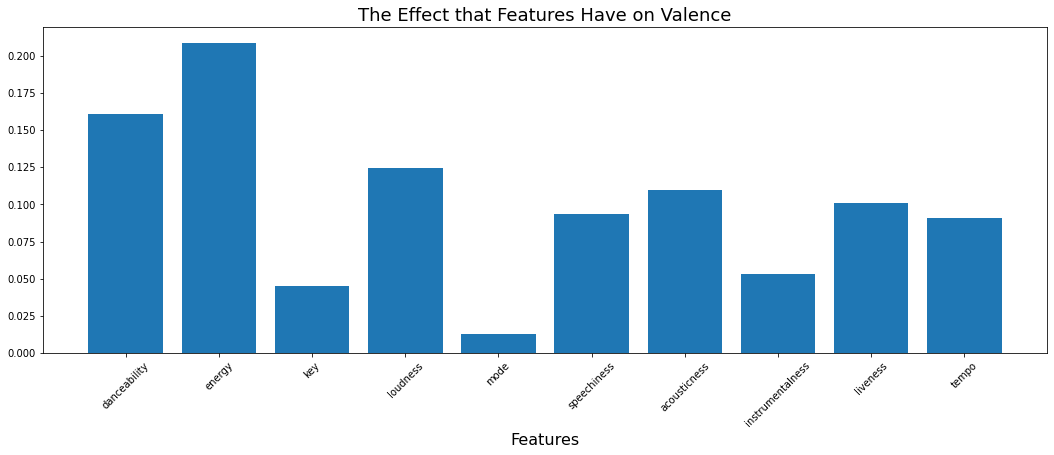

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,6))
plt.bar(*zip(*features_with_importance.items()))
plt.xticks(rotation = 45)
plt.title('Τhe Εffect that Features Have on Valence',fontsize=18)
plt.xlabel('Features',fontsize=16)
plt.show()

In [ ]:
# πρόβλεψεις απο το αρχειο spotify_ids.txt

In [ ]:
predictions_of_charts=model_best.predict(charts_for_predict.drop(columns=['valence','song_id','duration_ms']).values)
song_id=charts_for_predict.song_id
predictions_tree_model=dict(zip(song_id,predictions_of_charts))
predictions_tree_model

{'7lPN2DXiMsVn7XUKtOW1CS': 0.6183252216147298,
 '5QO79kh1waicV47BqGRL3g': 0.6120981813978881,
 '0VjIjW4GlUZAMYd2vXMi3b': 0.6065866674816889,
 '4MzXwWMhyBbmu6hOcLVD49': 0.6232002740323122,
 '5Kskr9LcNYa0tpt5f0ZEJx': 0.6450147209675172,
 '6tDDoYIxWvMLTdKpjFkc1B': 0.600406583223448,
 '3VT8hOC5vuDXBsHrR53WFh': 0.615438508363308,
 '1xK1Gg9SxG8fy2Ya373oqb': 0.6085900619161443,
 '6f3Slt0GbA2bPZlz0aIFXN': 0.6294846568300703,
 '3tjFYV6RSFtuktYl3ZtYcq': 0.6151439474778047,
 '27OeeYzk6klgBh83TSvGMA': 0.5996428354967304,
 '2XIc1pqjXV3Cr2BQUGNBck': 0.6248771498605523,
 '60ynsPSSKe6O3sfwRnIBRf': 0.6123351897799475,
 '1M4OcYkxAtu3ErzSgDEfoi': 0.6284765457127063,
 '3YJJjQPAbDT7mGpX3WtQ9A': 0.6137749692670774,
 '5nujrmhLynf4yMoMtj8AQF': 0.6124065598080721,
 '1t9WgS8FN0534tLBRwbaxO': 0.6156340891020138,
 '7vrJn5hDSXRmdXoR30KgF1': 0.6345295586096625,
 '4saklk6nie3yiGePpBwUoc': 0.6134868544580468,
 '3FAJ6O0NOHQV8Mc5Ri6ENp': 0.6008748810289269,
 '0D75ciM842cdUMKSMfAR9y': 0.6073610578803107,
 '35mvY5S1H3J2Q

# Απάντηση Ε2-assignment3

### Ε2: Πρόβλεψη Σθένους με Νευρωνικά Δίκτυα


---
#### Εφαρμογή Νευρωνικού Δικτύου
---

In [ ]:
# φόρτωση απαραίτητων βιβλιοθηκών 
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# παίρνουμε τα δεδομένα μας 
X_train=charts_for_train.drop(['song_id','duration_ms','valence'], axis=1).values
y_train=charts_for_train.valence.values

In [ ]:
X_train.shape

(13880, 10)

In [ ]:
y_train.shape

(13880,)

In [ ]:
# θα κανονικοποιήσουμε τα δεδομένα μας, αλλά δεν θα κάνουμε διαχωρισμό των δεδομένων, διότι θέλουμε να τα χρησιμοποιήσουμε όλα για την εκπαίδευση

In [ ]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))

In [ ]:
# Εδώ για τον καλύτερο αριθμό νευρώνων έχουμε  πειραματιστεί ώστε να φτάσουμε στον βέλτιστο. Το β΄΄ελτιστο το πήραμε βάση του διαγράμματος  που θα δείτε παρακάτω.
# Σκοπός ήταν να ταυτίσουμε όσο γίνεται περισσότερο το val loss και loss , το ένα προκύπτει απο τα cross-validation data  ενώ το άλλο απο τα training data.
# Όσο πιο κοντά είναι οι δύο ευθείες (ταυτίζονται) τόσο λιγότερη είναι η πιθανότητα να έχουμε overfitting στο μοντέλο μας.
# Επίσης στο στρώμα εξόδου βάζουμε την σιγμοειδή συνάρτηση επείδη θ΄έλουμε τιμ΄ές απο το 0 έως το 1.
# Τεχνικές που δεν έγιναν είναι η επιλογή διάφορων υπερπαραμέτρων και άλλων τεχνικών ΄ώστε να εξομαλυνθεί περαιτέρω τυχόν υπερπροσαρμογή.

neural_model = keras.Sequential([
    normalizer,
    layers.Dense(5, input_shape=(10,), activation='relu'),
    layers.Dense(1, activation=tf.nn.sigmoid),
])


In [ ]:
# βάζουμε τον βελτιστοποιητή στο μοντέλο μας και την μετρική που θέλουμε
neural_model.compile(loss='mean_absolute_error',
              optimizer='sgd')

In [ ]:
# εκπαιδεύουμε το μοντέλο μας
history=neural_model.fit(X_train, y_train, batch_size=32, 
                         epochs=100,
                         validation_split=0.2,
                         verbose=1)

Epoch 1/100
347/347 [==============================] - 1s 3ms/step - loss: 0.2306 - val_loss: 0.2193
Epoch 2/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1939 - val_loss: 0.1884
Epoch 3/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1794 - val_loss: 0.1783
Epoch 4/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1734 - val_loss: 0.1731
Epoch 5/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1697 - val_loss: 0.1701
Epoch 6/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1672 - val_loss: 0.1674
Epoch 7/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1655 - val_loss: 0.1658
Epoch 8/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1642 - val_loss: 0.1641
Epoch 9/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1631 - val_loss: 0.1635
Epoch 10/100
347/347 [==============================] - 1s 2ms/step - loss: 0.1623 - val_lo

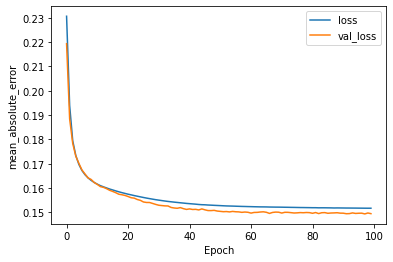

In [ ]:
# διάγραμμα - κριτήριο για τους νευρώνες που θα χρησιμποποιήσουμε ώστε να αποφύγουμε την υπερπροσαρμογή
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend()

In [ ]:
# εδώ έχουμε τις προβλέψεις για το spotify_ids.txt
predictions_of_charts=neural_model.predict(charts_for_predict.drop(columns=['valence','song_id','duration_ms']).values)
song_id=charts_for_predict.song_id
predictions_neural_model=dict(zip(song_id,predictions_of_charts))
predictions_neural_model

{'7lPN2DXiMsVn7XUKtOW1CS': array([0.3935703], dtype=float32),
 '5QO79kh1waicV47BqGRL3g': array([0.54086316], dtype=float32),
 '0VjIjW4GlUZAMYd2vXMi3b': array([0.39467922], dtype=float32),
 '4MzXwWMhyBbmu6hOcLVD49': array([0.49186656], dtype=float32),
 '5Kskr9LcNYa0tpt5f0ZEJx': array([0.50314695], dtype=float32),
 '6tDDoYIxWvMLTdKpjFkc1B': array([0.346194], dtype=float32),
 '3VT8hOC5vuDXBsHrR53WFh': array([0.51869184], dtype=float32),
 '1xK1Gg9SxG8fy2Ya373oqb': array([0.45840335], dtype=float32),
 '6f3Slt0GbA2bPZlz0aIFXN': array([0.4804185], dtype=float32),
 '3tjFYV6RSFtuktYl3ZtYcq': array([0.58151144], dtype=float32),
 '27OeeYzk6klgBh83TSvGMA': array([0.31621057], dtype=float32),
 '2XIc1pqjXV3Cr2BQUGNBck': array([0.47540376], dtype=float32),
 '60ynsPSSKe6O3sfwRnIBRf': array([0.4238082], dtype=float32),
 '1M4OcYkxAtu3ErzSgDEfoi': array([0.59642744], dtype=float32),
 '3YJJjQPAbDT7mGpX3WtQ9A': array([0.4464994], dtype=float32),
 '5nujrmhLynf4yMoMtj8AQF': array([0.59354484], dtype=float32)

---
#### Με Νευρωνικά Δίκτυα ή Χωρίς; 
---

In [ ]:
# Στην παραπάνω ερ΄ώτηση θα απαντήσουμε υπολογίζοντας  το μέσο απόλυτο σφάλμα ανά μοντέλο απο τα τελικά δύο μοντέλα που έχουμε.
# Αυτό με το μικρότερο μέσο απόλυτο σφάλμα θα είναι και το καλύτερο.

In [ ]:
# Μοντέλο με νευρώνες

In [ ]:
list_abs_neural=[]
for predict_song_id, predict_valence in predictions_neural_model.items():
    for target_song_id, target_valence in charts_for_predict[['song_id','valence']].values:
        if predict_song_id==target_song_id:
            list_abs_neural.append(np.absolute(target_valence-predict_valence))
print('Mean Absolute Error For Neural Model:',np.mean(list_abs_neural))

Mean Absolute Error For Neural Model: 0.1602089


In [ ]:
# Μοντέλο με δέντρα

In [ ]:
list_abs_tree=[]
for predict_song_id, predict_valence in predictions_tree_model.items():
    for target_song_id, target_valence in charts_for_predict[['song_id','valence']].values:
        if predict_song_id==target_song_id:
            list_abs_tree.append(np.absolute(target_valence-predict_valence))
print('Mean Absolute Error For Tree Model:',np.mean(list_abs_tree))

Mean Absolute Error For Tree Model: 0.20820673234100823
